This model is based on the California housing data that is available on kaggle at https://www.kaggle.com/datasets/camnugent/california-housing-prices.

It includes information about various areas of houses throughout the state including the median price.

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
data = pd.read_csv("housing.csv")

In [77]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [79]:
# since we have very few na values, we can just drop them
data.dropna(inplace=True)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

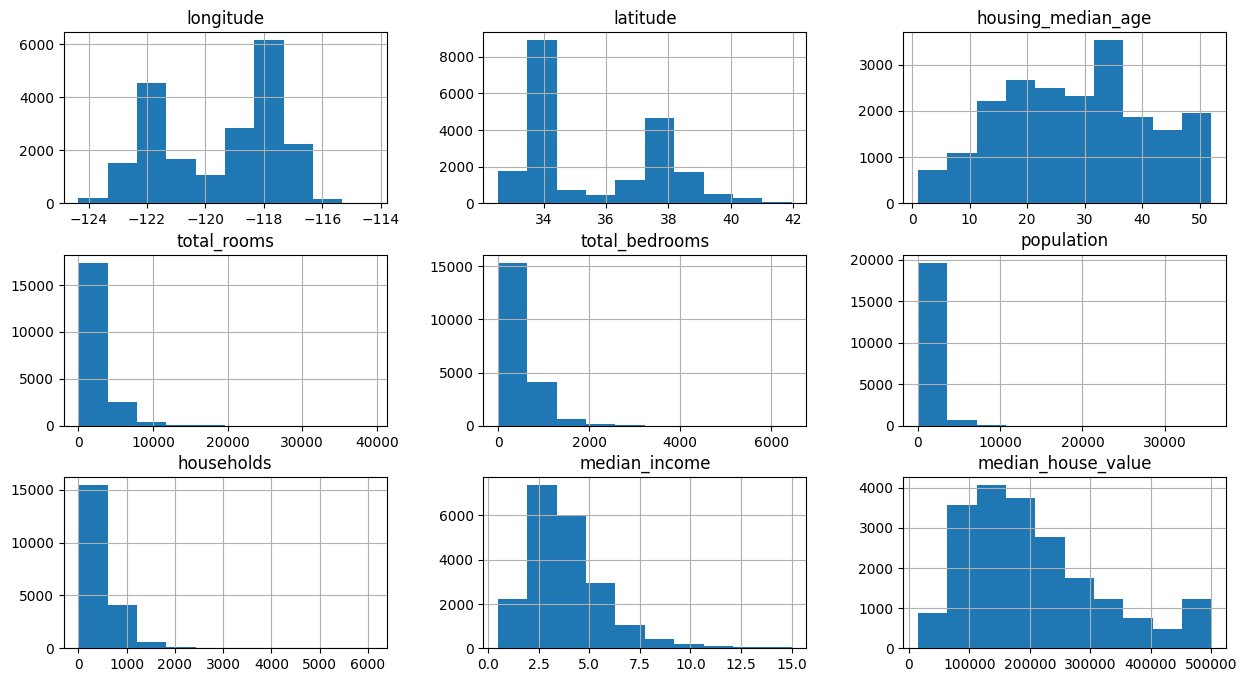

In [80]:
data.hist(figsize=(15,8))

In [81]:
# the ocean_proximity currently has values that are strings
# this doesn't work for a linear regression model
# so instead, we will turn each possible value into separate columns that are either 0 or 1
data = data.join(pd.get_dummies(data.ocean_proximity)).drop(['ocean_proximity'], axis = 1)

<Axes: >

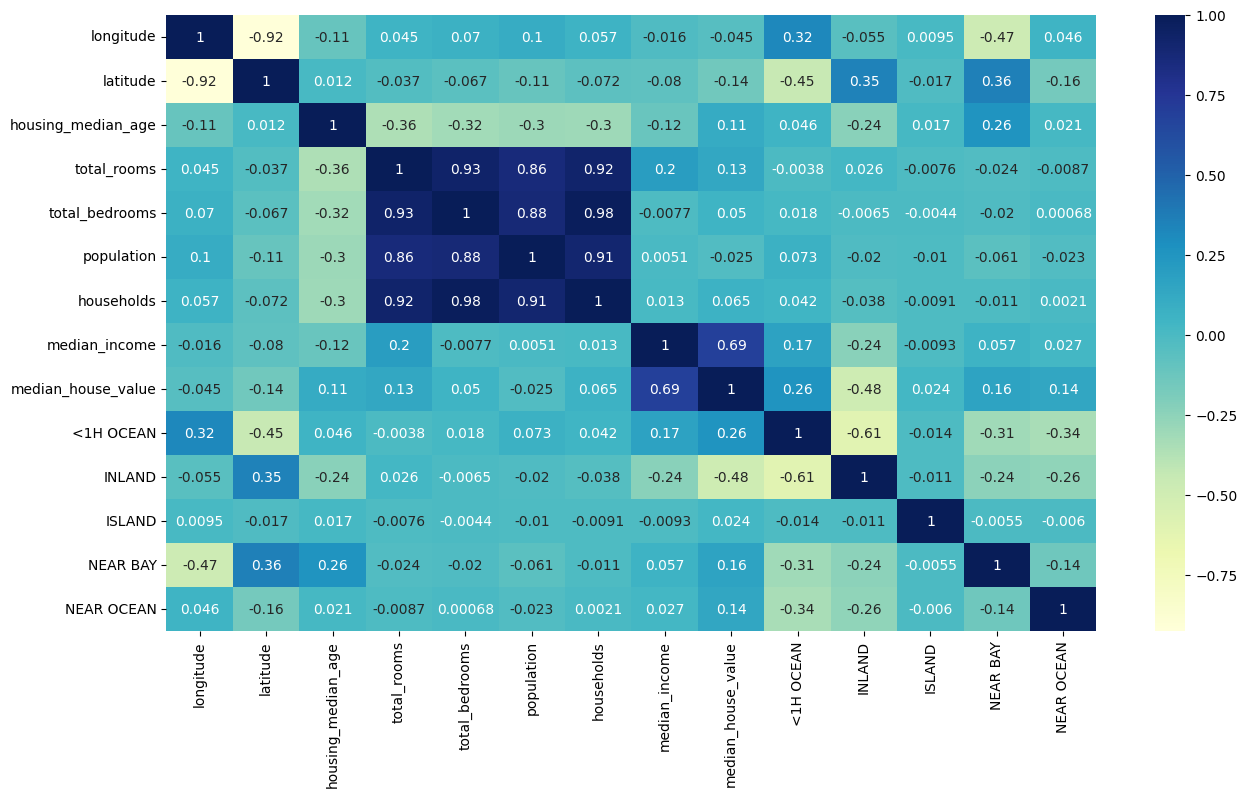

In [82]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")

In [83]:
# this creates new features that may be of interest

# approximates percentage of rooms that are bedrooms
data['bedroom_ratio'] = data['total_bedrooms'] / data['total_rooms']

# approximates the number of rooms per house
data['household_rooms'] = data['total_rooms'] / data['households']

# approximates number of people per house
data['pop_household_ratio'] = data['population'] / data['households']

<Axes: >

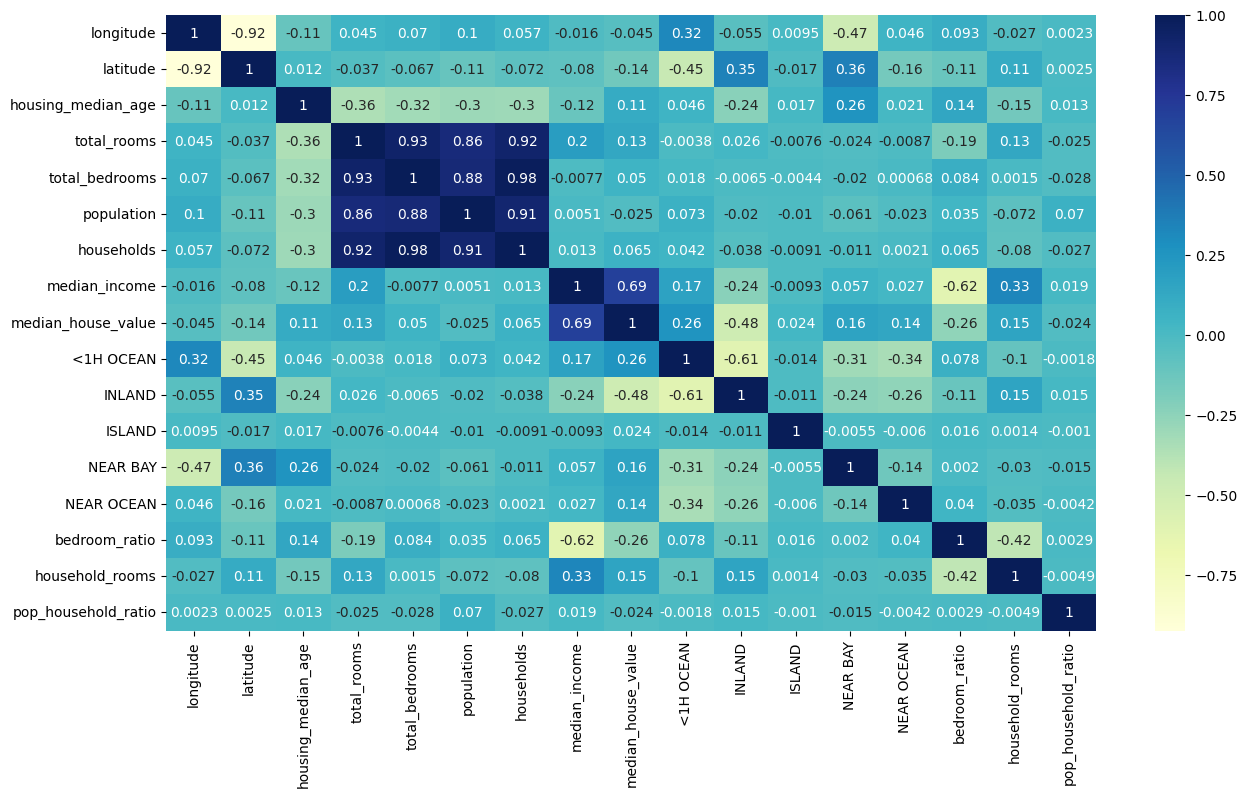

In [84]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")

In [85]:
# separate into input and output
X = data.drop(['median_house_value'], axis = 1)
y = data['median_house_value']

In [86]:
# standardize the data
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
X = scalar.fit_transform(X)

X = pd.DataFrame(X, columns = ["longitude","latitude","housing_median_age",'total_rooms','total_bedrooms','population','households','median_income','<1H OCEAN', 'INLAND','ISLAND','NEAR BAY','NEAR OCEAN','bedroom_ratio','household_rooms','pop_household_ratio'])

In [87]:
from sklearn.model_selection import train_test_split

# split into train and test data with an 80/20 split
x_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [88]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

In [89]:
train_data = x_train.join(y_train)

In [90]:
reg.fit(x_train, y_train)

LinearRegression()

In [91]:
test_data = X_test.join(y_test)

In [92]:
reg.score(X_test, y_test)

0.6494779094203509

This model results in a score that is generally in the 0.6 - 0.7 range which is a decent score, but it could be much better.

This could either be because there are better indicators of housing prices that we have not considered, or it could be because the relation between house prices and these indicators are not linear.